In [1]:
##Task: Given a concept (word), find the K (parameter) most frequent adjectives
#that appear with that noun (i.e., directly describe that noun) in the corpus of Amazon
#reviews (file: unlabeled_reviews.txt)


##Assignment: The concept (word) selected is 'PC'


In [2]:
# codecs library helps with reading from (or writing to) files with different encodings (e.g., UTF-8, ANSII, etc.)
import codecs

# specifying the location of the file containing our reviews
filepath = "unlabeled_reviews.txt"

# loading the content of the file and creating a list of texts from its lines (one review per line)
dataset = [l.strip() for l in list(codecs.open(filepath, "r", encoding = 'utf8', errors = 'replace').readlines())]

# let's see how many reviews we have in our dataset
print("We have: " + str(len(dataset)) + " reviews in the dataset.")
print()
      
# let's take a look at some concrete review
rev_index = 0
print(dataset[rev_index])

We have: 13153 reviews in the dataset.

First of all why do you want a power UPS? There are some very good reasons. (1) You never want your machine to go down incorrectly because of a blackout. (2) You want to work with clean power only. (3) You want to monitor your PC power. (4) You want to prevent your PC from being damaged due to a power problem like a lighting strike and want surge protection. The first rule about UPS is to never trust the insurance claim. Get your PC insured elsewhere. These companies have a tendency not to support their insurance claims. I have a PC running some very high specifications with over six USB devices, LCD monitor, printer and Ethernet equipment, with everything on at the same time. I have never gone above 325W of usage and average between 250W and 300W when managing a high spec game and doing lots of background tasks. Even though I have a 400W Power Supply Unit (PSU) I will be upgrading to a 500W PSU because it is better quality model. The way I can m

In [ ]:
# pip install wordcloud

In [ ]:
# pip install matplotlib

Let's do a bit of explorative analysis of our dataset. Which electronic devices are most represented in the dataset? 

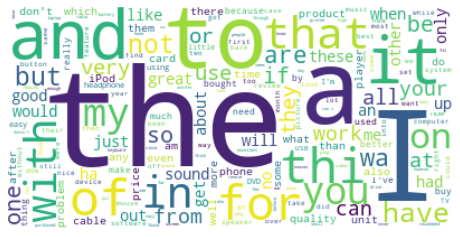

In [3]:
# wordcloud is a Python library for generating word clouds from text
import wordcloud
from wordcloud import WordCloud

# matplotlib is a Python library for plotting / rendering data and graphs of all kinds
import matplotlib.pyplot as plt

# concatenating all our reviews into one long text
big_text = " ".join(dataset)

# creating an object of WordCloud which we will then depict: defining white background and feeding our big text
wcloud = WordCloud(collocations = False, background_color = "white", stopwords = []).generate_from_text(big_text)

# setting the size of the figure for wordclous plot
plt.figure(figsize=(8,7))

# plotting the created wordcloud
plt.imshow(wcloud, interpolation = "bilinear")
# we don't want to plot the axis
plt.axis("off")
# showing the plot
plt.show()


In [4]:
# import the list of English STOPWORDS from the wordcloud library
from wordcloud import STOPWORDS

# removing the repetitions if there are any, converting the list to set
stopwords = set(STOPWORDS)

# printing the list of stopwords
print(stopwords)

{'r', "they'll", "they've", 'an', "we'll", 'how', "wasn't", 'what', "isn't", 'not', "she's", "where's", 'being', 'yours', "can't", 'his', 'why', 'else', "you'll", 'also', 'are', 'her', "what's", 'would', 'ever', 'hence', 'ours', 'both', "how's", 'few', 'from', 'such', "hadn't", 'over', "wouldn't", 'him', "he'd", 'be', 'otherwise', 'same', "you've", 'hers', 'so', 'about', 'most', 'own', 'its', "i've", 'under', 'cannot', "haven't", 'com', 'she', 'these', 'this', 'http', 'k', 'am', 'been', "she'd", 'www', 'those', 'they', "she'll", 'their', 'through', 'therefore', 'having', 'my', 'once', 'further', 'have', 'each', 'but', 'between', "i'm", "you'd", 'any', 'at', 'just', 'very', 'get', 'against', 'on', 'during', 'you', 'like', 'where', "i'll", 'myself', "shouldn't", 'no', 'that', 'yourself', 'after', "don't", 'was', 'himself', 'again', 'too', 'the', 'herself', "won't", 'off', 'should', 'yourselves', "couldn't", "they're", "shan't", "when's", 'and', 'who', 'or', 'it', 'only', 'there', "he's",

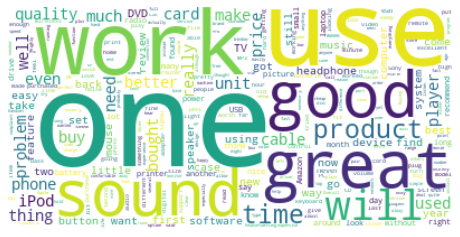

In [5]:
# setting the size of the figure for wordcloud plot
plt.figure(figsize=(8,7))

# creating an object of WordCloud which we will then depict: defining white background and feeding our big text
wcloud = WordCloud(max_words = 500, collocations = False, background_color = "white", stopwords = stopwords).generate_from_text(big_text)

# plotting the created wordcloud
plt.imshow(wcloud, interpolation = "bilinear")

# we don't want to plot the axis
plt.axis("off")

# showing the plot
plt.show()

In [ ]:
# pip install spacy

In [ ]:
# pip install -U spacy

In [ ]:
#conda install -c conda-forge spacy

### Text Preprocessing (tokenization, lemmatization / stemming stopword removal)
let's break down the texts into tokens, normalize the texts (lemmatize or stem) and remove stopwords

In [ ]:
# conda update -n base -c defaults conda


In [6]:
import spacy 

spacy.cli.download("en_core_web_sm")

nlp = spacy.load("en_core_web_sm")

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [7]:
## python -m spacy download en_core_web_sm

In [8]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [9]:
####### Tokenization

# we will use the SpaCy library for preprocessing and linguistic annotations
import spacy

# the default nlp pipeline will perform tokenization, POS-tagging, dependency parsing, and named entity recognition
nlp = spacy.load("en_core_web_sm")


tokenized_dataset = []
# if we just want tokenization, additional steps may slow the process, so we can use the "pipe" mode of SpaCy instead
# to eliminate POS-tagging, parsing, and NER
for doc in nlp.pipe(dataset, disable=["tagger", "parser", "ner"]):
    # t.text will give us the original text for each token in the text/document
    tokenized_dataset.append([t.text for t in doc])
    
print(tokenized_dataset[rev_index])


['First', 'of', 'all', 'why', 'do', 'you', 'want', 'a', 'power', 'UPS', '?', 'There', 'are', 'some', 'very', 'good', 'reasons', '.', '(', '1', ')', 'You', 'never', 'want', 'your', 'machine', 'to', 'go', 'down', 'incorrectly', 'because', 'of', 'a', 'blackout', '.', '(', '2', ')', 'You', 'want', 'to', 'work', 'with', 'clean', 'power', 'only', '.', '(', '3', ')', 'You', 'want', 'to', 'monitor', 'your', 'PC', 'power', '.', '(', '4', ')', 'You', 'want', 'to', 'prevent', 'your', 'PC', 'from', 'being', 'damaged', 'due', 'to', 'a', 'power', 'problem', 'like', 'a', 'lighting', 'strike', 'and', 'want', 'surge', 'protection', '.', 'The', 'first', 'rule', 'about', 'UPS', 'is', 'to', 'never', 'trust', 'the', 'insurance', 'claim', '.', 'Get', 'your', 'PC', 'insured', 'elsewhere', '.', 'These', 'companies', 'have', 'a', 'tendency', 'not', 'to', 'support', 'their', 'insurance', 'claims', '.', 'I', 'have', 'a', 'PC', 'running', 'some', 'very', 'high', 'specifications', 'with', 'over', 'six', 'USB', 'de

In [10]:
###### Lemmatization

lemmatized_dataset = []
for doc in nlp.pipe(dataset, disable=["tagger", "parser", "ner"]):
    
    # t.lemma_ will give us the lemma for each token in the text/document
    lemmatized_dataset.append([t.lemma_ for t in doc])

print()
print(lemmatized_dataset[rev_index])


['First', 'of', 'all', 'why', 'do', 'you', 'want', 'a', 'power', 'UPS', '?', 'There', 'be', 'some', 'very', 'good', 'reason', '.', '(', '1', ')', 'You', 'never', 'want', 'your', 'machine', 'to', 'go', 'down', 'incorrectly', 'because', 'of', 'a', 'blackout', '.', '(', '2', ')', 'You', 'want', 'to', 'work', 'with', 'clean', 'power', 'only', '.', '(', '3', ')', 'You', 'want', 'to', 'monitor', 'your', 'PC', 'power', '.', '(', '4', ')', 'You', 'want', 'to', 'prevent', 'your', 'PC', 'from', 'be', 'damage', 'due', 'to', 'a', 'power', 'problem', 'like', 'a', 'light', 'strike', 'and', 'want', 'surge', 'protection', '.', 'The', '\ufeff1', 'rule', 'about', 'UPS', 'be', 'to', 'never', 'trust', 'the', 'insurance', 'claim', '.', 'Get', 'your', 'PC', 'insure', 'elsewhere', '.', 'These', 'company', 'have', 'a', 'tendency', 'not', 'to', 'support', 'their', 'insurance', 'claim', '.', 'I', 'have', 'a', 'PC', 'run', 'some', 'very', 'high', 'specification', 'with', 'over', 'six', 'USB', 'device', ',', 'LC

In [11]:
####### Stemming 

# we will use the Porter stemmer from the NLTK library
import nltk
from nltk.stem.porter import *

# instantiate the stemmer object
stemmer = PorterStemmer()

stemmed_dataset = []
for doc in nlp.pipe(dataset, disable=["tagger", "parser", "ner"]):
    
    # t.text will give us the raw token text which we then stem with the stemmer
    stemmed_dataset.append([stemmer.stem(t.text) for t in doc])

print()
print(stemmed_dataset[rev_index])




['first', 'of', 'all', 'whi', 'do', 'you', 'want', 'a', 'power', 'up', '?', 'there', 'are', 'some', 'veri', 'good', 'reason', '.', '(', '1', ')', 'you', 'never', 'want', 'your', 'machin', 'to', 'go', 'down', 'incorrectli', 'becaus', 'of', 'a', 'blackout', '.', '(', '2', ')', 'you', 'want', 'to', 'work', 'with', 'clean', 'power', 'onli', '.', '(', '3', ')', 'you', 'want', 'to', 'monitor', 'your', 'PC', 'power', '.', '(', '4', ')', 'you', 'want', 'to', 'prevent', 'your', 'PC', 'from', 'be', 'damag', 'due', 'to', 'a', 'power', 'problem', 'like', 'a', 'light', 'strike', 'and', 'want', 'surg', 'protect', '.', 'the', 'first', 'rule', 'about', 'up', 'is', 'to', 'never', 'trust', 'the', 'insur', 'claim', '.', 'get', 'your', 'PC', 'insur', 'elsewher', '.', 'these', 'compani', 'have', 'a', 'tendenc', 'not', 'to', 'support', 'their', 'insur', 'claim', '.', 'I', 'have', 'a', 'PC', 'run', 'some', 'veri', 'high', 'specif', 'with', 'over', 'six', 'usb', 'devic', ',', 'lcd', 'monitor', ',', 'printer'

### Linguistic annotations: POS-tagging and dependency parsing
SpaCy has pre-trained models for POS-tagging and dependency parsing



In [12]:
# parsing and pos-tagging may take longer on large datasets, so let's only demonstrate the functionality on first N reviews in our collection
N = 2
small_dataset = dataset[:N]

for doc in nlp.pipe(small_dataset, disable=["ner"]):
    # POS-tagging and parses are performed on a sentence-level (not document level, like tokenization)
    for sent in doc.sents:
        print(sent.text)
        print("------------------------------------")
        for tok in sent:
            # tok.i index of the token in the document
            # sent.start index of the starting token of the sentence in the document
            # tok.tag_ is the fine-grained POS-tag; 
            # tok.pos_ is the coarse-grained POS-tag; 
            # tok.dep_ is the dependency relation from the governing token to this token
            # tok.head is the token which is the syntactic head of the current token (.text is it's text, .i its index in the document)
            print(tok.i - sent.start, tok.text, tok.tag_, tok.pos_, tok.dep_, tok.head.text, "(" + str(tok.head.i - sent.start) + ")")
        print()        
                
    
    

First of all why do you want a power UPS?
------------------------------------
0 First RB ADV advmod want (6)
1 of IN ADP prep First (0)
2 all DT DET pobj of (1)
3 why WRB ADV advmod want (6)
4 do VBP AUX aux want (6)
5 you PRP PRON nsubj want (6)
6 want VB VERB ROOT want (6)
7 a DT DET det UPS (9)
8 power NN NOUN compound UPS (9)
9 UPS NNP PROPN dobj want (6)
10 ? . PUNCT punct want (6)

There are some very good reasons.
------------------------------------
0 There EX PRON expl are (1)
1 are VBP AUX ROOT are (1)
2 some DT DET det reasons (5)
3 very RB ADV advmod good (4)
4 good JJ ADJ amod reasons (5)
5 reasons NNS NOUN attr are (1)
6 . . PUNCT punct are (1)

(1) You never want your machine to go down incorrectly because of a blackout.
------------------------------------
0 ( -LRB- PUNCT punct 1 (1)
1 1 LS X meta want (5)
2 ) -RRB- PUNCT punct 1 (1)
3 You PRP PRON nsubj want (5)
4 never RB ADV neg want (5)
5 want VBP VERB ROOT want (5)
6 your PRP$ DET poss machine (7)
7 machine NN NOU

21 many JJ ADJ amod watts (22)
22 watts NNS NOUN dobj use (24)
23 you PRP PRON nsubj use (24)
24 use VBP VERB ccomp tells (18)
25 because IN SCONJ mark appears (27)
26 that DT DET nsubj appears (27)
27 appears VBZ VERB advcl install (12)
28 to TO PART aux be (29)
29 be VB AUX xcomp appears (27)
30 the DT DET det way (32)
31 only JJ ADJ amod way (32)
32 way NN NOUN attr be (29)
33 you PRP PRON nsubj monitor (35)
34 can MD VERB aux monitor (35)
35 monitor VB VERB relcl way (32)
36 your PRP$ DET poss wattage (37)
37 wattage NN NOUN dobj monitor (35)
38 at IN ADP prep monitor (35)
39 this DT DET det time (40)
40 time NN NOUN pobj at (38)
41 . . PUNCT punct is (5)

You need to estimate what it is.
------------------------------------
0 You PRP PRON nsubj need (1)
1 need VBP VERB ROOT need (1)
2 to TO PART aux estimate (3)
3 estimate VB VERB xcomp need (1)
4 what WP PRON attr is (6)
5 it PRP PRON nsubj is (6)
6 is VBZ AUX ccomp estimate (3)
7 . . PUNCT punct need (1)

I would say a high-end 

14 a DT DET det connection (16)
15 USB NN NOUN compound connection (16)
16 connection NN NOUN pobj with (13)
17 . . PUNCT punct is (9)

If it does this is a big plus because it means you can control it from your PC and the UPS comes with software.
------------------------------------
0 If IN SCONJ mark does (2)
1 it PRP PRON nsubj does (2)
2 does VBZ AUX advcl is (4)
3 this DT DET nsubj is (4)
4 is VBZ AUX ROOT is (4)
5 a DT DET det big (6)
6 big JJ ADJ amod plus (7)
7 plus NN NOUN attr is (4)
8 because IN SCONJ mark means (10)
9 it PRP PRON nsubj means (10)
10 means VBZ VERB advcl is (4)
11 you PRP PRON nsubj control (13)
12 can MD VERB aux control (13)
13 control VB VERB ccomp means (10)
14 it PRP PRON dobj control (13)
15 from IN ADP prep control (13)
16 your PRP$ DET poss PC (17)
17 PC NN NOUN pobj from (15)
18 and CC CCONJ cc control (13)
19 the DT DET det UPS (20)
20 UPS NNP PROPN nsubj comes (21)
21 comes VBZ VERB conj control (13)
22 with IN ADP prep comes (21)
23 software NN N

7 a DT DET det blackout (8)
8 blackout NN NOUN dobj simulate (6)
9 in IN ADP prep simulate (6)
10 your PRP$ DET poss home (11)
11 home NN NOUN pobj in (9)
12 to TO PART aux see (13)
13 see VB VERB advcl simulate (6)
14 if IN SCONJ mark stays (17)
15 the DT DET det PC (16)
16 PC NN NOUN nsubj stays (17)
17 stays VBZ VERB ccomp see (13)
18 up RP ADP prt stays (17)
19 . . PUNCT punct consider (3)

Usually a UPS is programmed to shutdown your PC if the blackout lasts for a few seconds.
------------------------------------
0 Usually RB ADV advmod programmed (4)
1 a DT DET det UPS (2)
2 UPS NNP PROPN nsubjpass programmed (4)
3 is VBZ AUX auxpass programmed (4)
4 programmed VBN VERB ROOT programmed (4)
5 to TO PART aux shutdown (6)
6 shutdown VB VERB xcomp programmed (4)
7 your PRP$ DET poss PC (8)
8 PC NN NOUN dobj shutdown (6)
9 if IN SCONJ mark lasts (12)
10 the DT DET det blackout (11)
11 blackout NN NOUN nsubj lasts (12)
12 lasts VBZ VERB advcl shutdown (6)
13 for IN ADP prep lasts (12)


9 replaced VBN VERB xcomp need (6)
10 after IN ADP prep replaced (9)
11 a DT DET det years (13)
12 few JJ ADJ amod years (13)
13 years NNS NOUN pobj after (10)
14 if IN SCONJ mark end (16)
15 you PRP PRON nsubj end (16)
16 end VBP VERB advcl need (6)
17 up RP ADP prt end (16)
18 using VBG VERB xcomp end (16)
19 them PRP PRON dobj using (18)
20 a DT DET det lot (21)
21 lot NN NOUN npadvmod using (18)
22 . . PUNCT punct need (6)

This is everything you need to know about an UPS before you choose one.
------------------------------------
0 This DT DET nsubj is (1)
1 is VBZ AUX ROOT is (1)
2 everything NN PRON attr is (1)
3 you PRP PRON nsubj need (4)
4 need VBP VERB relcl everything (2)
5 to TO PART aux know (6)
6 know VB VERB xcomp need (4)
7 about IN ADP prep know (6)
8 an DT DET det UPS (9)
9 UPS NNP PROPN pobj about (7)
10 before IN ADP mark choose (12)
11 you PRP PRON nsubj choose (12)
12 choose VBP VERB advcl know (6)
13 one CD NUM dobj choose (12)
14 . . PUNCT punct is (1)

It is b

In [13]:
# displacy sublibrary part of SpaCy lets us visualize the dependency parse of a sentence
import spacy
from spacy import displacy

sentence = "These companies have a tendency not to support their insurance claims."
sent = nlp(sentence)
displacy.serve(sent, style = "dep")


C:\ProgramData\Anaconda3\lib\site-packages\spacy\displacy\__init__.py:94: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.



##Task: Given a concept (word), find the K (parameter) most frequent adjectives
that appear with that noun (i.e., directly describe that noun) in the corpus of Amazon
reviews (file: unlabeled_reviews.txt in the data subdirectory of the tutorials)

##Assignment: The concept (word) selected is 'PC'. In other words, search for patterns "[ADJ] PC" -- i.e., where "ADJ" precedes the token with the lemma "PC"

In [14]:
nlp.add_pipe(nlp.create_pipe('sentencizer'))

In [16]:
# if we're not using dependency parsing (which in case we won't) we need to add an explicit sentence splitter to the Spacy pipeline
#nlp.add_pipe(nlp.create_pipe('sentencizer'))

# solution
aspects = []


for doc in nlp.pipe(dataset, disable=["parser", "ner"]):
    for sent in doc.sents:
        for tok in sent:
            # if the lemma of the token is "PC"
            if tok.lemma_ == "PC":
                # and it is not the first token in the sentence and the preceeding token has POS-tag "JJ" or "NN"
                if (tok.i - sent.start > 0) and doc[tok.i - 1].pos_ in ["ADJ"]:
                    print(sent.text)
                    print("-----------------")
                    asp = doc[tok.i - 1].text
                    print(asp)
                    print()
                    
                    aspects.append(asp)

unique_aspect_words = set(aspects)
print([uas + "PC" for uas in unique_aspect_words])
    

Delorme has a product that is not even compatible with the present PC Handheld operating system.
-----------------
present

The other is, that the antenna cable for the wireless PC Card needs to be longer to more easily place the antenna on my computer's furniture cabinet
-----------------
wireless

Newer PC's (if you build your own) seem to all have this port already built in to the motherboard.
-----------------
Newer

I needed a USB cord for new PC/Printer installations.
-----------------
new

Besides, according to a recent PC Magazine review, a number of no-brand keyboards usually sold by chains like CompUSA actually sport very good quality at very low prices, so this might be another route for a conscious keyboard shopper
-----------------
recent

My $150 (I think I paid more over the summer) Sony recorder now sits in my bag and I only use the $79.99 "Olympus Digital Voice Recorder with Direct PC Link".
-----------------
Direct

Many cheap under designed amplified PC speakers act 